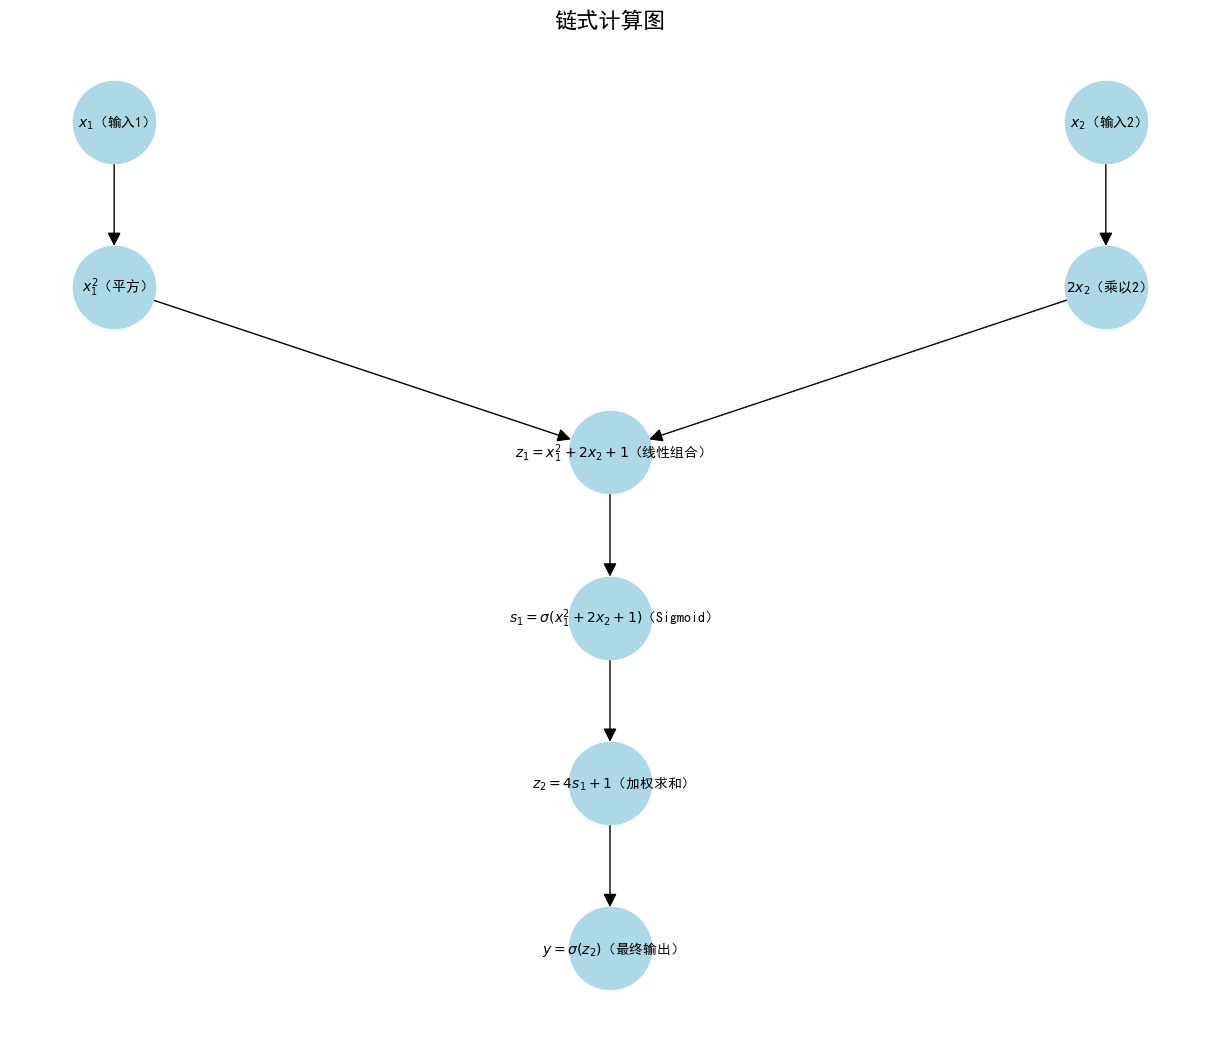

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams

# 设置 Matplotlib 中文字体支持
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 创建有向图
G = nx.DiGraph()

# 添加节点
# 输入层
G.add_node(r"$x_1$（输入1）", pos=(1, 12))
G.add_node(r"$x_2$（输入2）", pos=(3, 12))

# 中间层 - 第一步计算 x1平方和 2x2 + 1
G.add_node(r"$x_1^2$（平方）", pos=(0.8, 7))
G.add_node(r"$2x_2$（乘以2）", pos=(1.9, 8))
G.add_node(r"$z_1=x_1^2 + 2x_2 + 1$（线性组合）", pos=(1, 4))

# Sigmoid 激活函数的应用
G.add_node(r"$s_1 = \sigma(x_1^2 + 2x_2 + 1)$（Sigmoid）", pos=(1, 3))

# 加权求和
G.add_node(r"$z_2 = 4s_1 + 1$（加权求和）", pos=(1, 2))

# 输出层
G.add_node(r"$y = \sigma(z_2)$（最终输出）", pos=(1, 1))

# 添加边
# 输入层到中间层
G.add_edge(r"$x_1$（输入1）", r"$x_1^2$（平方）")
G.add_edge(r"$x_2$（输入2）", r"$2x_2$（乘以2）")
G.add_edge(r"$x_1^2$（平方）", r"$z_1=x_1^2 + 2x_2 + 1$（线性组合）")
G.add_edge(r"$2x_2$（乘以2）", r"$z_1=x_1^2 + 2x_2 + 1$（线性组合）")

# 中间层到 Sigmoid 层
G.add_edge(r"$z_1=x_1^2 + 2x_2 + 1$（线性组合）", r"$s_1 = \sigma(x_1^2 + 2x_2 + 1)$（Sigmoid）")

# Sigmoid 层到加权求和
G.add_edge(r"$s_1 = \sigma(x_1^2 + 2x_2 + 1)$（Sigmoid）", r"$z_2 = 4s_1 + 1$（加权求和）")

# 加权求和到最终输出
G.add_edge(r"$z_2 = 4s_1 + 1$（加权求和）", r"$y = \sigma(z_2)$（最终输出）")

# 获取节点位置
pos = nx.get_node_attributes(G, 'pos')

# 绘制计算图
plt.figure(figsize=(12, 10))
nx.draw(
    G, pos, with_labels=True, node_size=3500, 
    node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20,
    edge_color="black"
)

# 设置标题
plt.title("链式计算图", fontsize=16)
plt.show()

In [2]:
import torch

# 初始化输入 x1 和 x2
x1 = torch.tensor(0.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)

# 计算中间变量
z1 = x1**2 + 2 * x2 + 1
s1 = torch.sigmoid(z1)
z2 = 3 * s1 + s1 + 1  # 合并 s2，因为 s2 = s1
y = torch.sigmoid(z2)

# 计算 y 的梯度，保留计算图
y.backward(retain_graph=True)

# 自动提取各变量对 x1 和 x2 的梯度
dz1_dx1 = torch.autograd.grad(z1, x1, retain_graph=True)[0]
ds1_dx1 = torch.autograd.grad(s1, x1, retain_graph=True)[0]
dz2_dx1 = torch.autograd.grad(z2, x1, retain_graph=True)[0]
dy_dx1 = x1.grad

dz1_dx2 = torch.autograd.grad(z1, x2, retain_graph=True)[0]
ds1_dx2 = torch.autograd.grad(s1, x2, retain_graph=True)[0]
dz2_dx2 = torch.autograd.grad(z2, x2, retain_graph=True)[0]
dy_dx2 = x2.grad

# 输出结果
print("\n对于 x1:")
print(f"∂z1/∂x1 = {dz1_dx1.item()}")
print(f"∂s1/∂x1 = {ds1_dx1.item()}")
print(f"∂z2/∂x1 = {dz2_dx1.item()}")
print(f"∂y/∂x1 = {dy_dx1.item()}")

print("\n对于 x2:")
print(f"∂z1/∂x2 = {dz1_dx2.item()}")
print(f"∂s1/∂x2 = {ds1_dx2.item()}")
print(f"∂z2/∂x2 = {dz2_dx2.item()}")
print(f"∂y/∂x2 = {dy_dx2.item()}")

ModuleNotFoundError: No module named 'torch'

In [3]:
pip install torch

     ------------------------------------ 203.0/203.0 MB 998.9 kB/s eta 0:00:00
     ---------------------------------------- 6.2/6.2 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.10.1
    Uninstalling sympy-1.10.1:
      Successfully uninstalled sympy-1.10.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
import torch.nn.functional as F

# 初始化输入 x1 和 x2
x1 = torch.tensor(0.0, requires_grad=True)
x2 = torch.tensor(1.0, requires_grad=True)

# 计算中间变量
z1 = x1**2 + 2*x2 + 1
print(f"z1 = {z1.item()} (z1 是由 x1 和 x2 计算得来，z1 = x1^2 + 2 * x2 + 1)")

s1 = torch.sigmoid(z1)
s2 = torch.sigmoid(z1)
print(f"s1 = {s1.item()} (s1 是 z1 的 Sigmoid，s1 = sigmoid(z1))")
print(f"s2 = {s2.item()} (s2 是 z1 的 Sigmoid，s2 = sigmoid(z1))")

z2 = 3 * s1 + s2 + 1
print(f"z2 = {z2.item()} (z2 = 3 * s1 + s2 + 1)")

y = torch.sigmoid(z2)
print(f"y = {y.item()} (y 是 z2 的 Sigmoid，y = sigmoid(z2))")

# 计算各个中间变量对 x1 和 x2 的偏导数

# 对 x1 求导
y.backward(retain_graph=True)  # 计算梯度，保留计算图

# 获取对 x1 和 x2 的梯度
dy_dx1 = x1.grad.item()  # 获取对 x1 的梯度
dy_dx2 = x2.grad.item()  # 获取对 x2 的梯度

# 打印导数结果，并标明是对哪个变量求导
print(f"\n--------- 求导过程 ---------")
print(f"对 x1 的偏导数：")
print(f"1. 计算 z1 = x1^2 + 2 * x2 + 1 对 x1 的导数：")
print(f"    ∂z1/∂x1 = 2 * x1 = 2 * {x1.item()} = {2 * x1.item()}")
print(f"2. 计算 s1 = sigmoid(z1) 对 z1 的导数：")
print(f"    ∂s1/∂z1 = s1 * (1 - s1) = {s1.item()} * (1 - {s1.item()}) = {s1.item() * (1 - s1.item())}")
print(f"3. 计算 z2 = 3 * s1 + s2 + 1 对 s1 的导数：")
print(f"    ∂z2/∂s1 = 3")
print(f"4. 计算 y = sigmoid(z2) 对 z2 的导数：")
print(f"    ∂y/∂z2 = y * (1 - y) = {y.item()} * (1 - {y.item()}) = {y.item() * (1 - y.item())}")
print(f"5. 综合上述，得到对 x1 的偏导数：")
print(f"    ∂y/∂x1 = ∂y/∂z2 * ∂z2/∂s1 * ∂s1/∂z1 * ∂z1/∂x1 = {dy_dx1}")
print(f"--------------------------------")

print(f"\n对 x2 的偏导数：")
print(f"1. 计算 z1 = x1^2 + 2 * x2 + 1 对 x2 的导数：")
print(f"    ∂z1/∂x2 = 2")
print(f"2. 计算 s1 = sigmoid(z1) 对 z1 的导数：")
print(f"    ∂s1/∂z1 = s1 * (1 - s1) = {s1.item()} * (1 - {s1.item()}) = {s1.item() * (1 - s1.item())}")
print(f"3. 计算 z2 = 3 * s1 + s2 + 1 对 s1 的导数：")
print(f"    ∂z2/∂s1 = 3")
print(f"4. 计算 y = sigmoid(z2) 对 z2 的导数：")
print(f"    ∂y/∂z2 = y * (1 - y) = {y.item()} * (1 - {y.item()}) = {y.item() * (1 - y.item())}")
print(f"5. 综合上述，得到对 x2 的偏导数：")
print(f"    ∂y/∂x2 = ∂y/∂z2 * ∂z2/∂s1 * ∂s1/∂z1 * ∂z1/∂x2 = {dy_dx2}")
print(f"--------------------------------")

# 最终结果
print(f"\ndy/dx1 = {dy_dx1} (对 x1 的偏导数)")
print(f"dy/dx2 = {dy_dx2} (对 x2 的偏导数)")